# Welcome to your first assignment of the SSL lecture

We are very glad, that you took the first step and opened this Jupyter Notebook successfully.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry. We need you to upload the .ipynb-file and the exported .pdf of this notebook.

This and all the upcoming assignment notebooks will guide you (more or less) through the tasks we want you to solve. You sometimes will find some code snippets, which may help you to solve the tasks. But you are also free to implement your own functions, if you want to.

For the first week we want you implement and train a simple neural network with backpropagation, just like we did in the lecture. If you have any questions, ask them in either in the tutorials or in the "Mattermost" channel: https://mattermost.imp.fu-berlin.de/biorobotics/channels/ssl_ws_2324

The Exercise description states the **RESULT** we will grade.

## Slide Review

[Google Form](https://forms.gle/MstgymkWzPcWDFCa7) for the slide review. Please take one minute to scroll over the slides again and improve your lecture.

#### Please state both names of your group members here:
Authors: Mansai Acharya, Namrata De

# Assignment 1: Backpropagation
We recommend you read the chapter 7.3.3 of the Rojas book (https://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/1996/NeuralNetworks/neuron.pdf), and learn about the "matrix way" of implementing backprop.

## Ex. 1.1 XOR
Implement a two-layer artificial neural network with two input neurons and one output neuron. Choose the number of hidden neurons to your liking. Our goal is to learn the [XOR gate](https://en.wikipedia.org/wiki/XOR_gate). What does the untrained network (= random weights) return for all (four) combinations of inputs? **(RESULT)**

In [1]:
import numpy as np

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initializing random weights for the input layer and hidden layer
np.random.seed(0)
input_weights = np.random.rand(2, 2)  # 2 input neurons, 2 hidden neurons
# print("input_weights\n",input_weights)

output_weights = np.random.rand(2, 1)  # 2 hidden neurons, 1 output neuron
# print("output_weights\n",output_weights)
# print("-------------------------")

# Defining the XOR gate input combinations
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Calculating the untrained network's output for each input
results = []

for x in X:
    # Forward pass
    hidden_layer_input = np.dot(x, input_weights)
#     print("x", x)
#     print("Dot Product Between",x,"and",input_weights)
#     print("hidden_layer_input\n", hidden_layer_input)  #Wx 
    hidden_layer_output = sigmoid(hidden_layer_input)
#     print("Applying sigmoid on",hidden_layer_input)
#     print("hidden_layer_output\n",hidden_layer_output)
#     print("-------------------------")

    
    output_layer_input = np.dot(hidden_layer_output, output_weights)
#     print("output_layer_input\n",output_layer_input)
    
    output_layer_output = sigmoid(output_layer_input)
#     print("output_layer_output\n",output_layer_output)
    
#     print("-------------------------")

    
    results.append(output_layer_output[0])

# Results for the four input combinations
for i, x in enumerate(X):
    print(f"Input: {x}, Output: {results[i]}")


Input: [0 0], Output: 0.6305959879693437
Input: [0 1], Output: 0.6643232655350776
Input: [1 0], Output: 0.6686944290867527
Input: [1 1], Output: 0.6953112580043233


## Ex. 1.2 Backpropagation
Implement Backpropagation and optimize the weights of your neural network using the XOR training set: 

### x, y

(0,0), 0 

(0,1), 1

(1,0), 1

(1,1), 0

How many training iterations do you need? Plot the network error over the number of iterations! **(RESULT)**

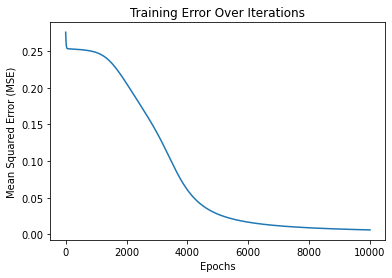

Input: [0 0], Output: 0.10175704407065068
Input: [0 1], Output: 0.9286584388815081
Input: [1 0], Output: 0.9218726640531882
Input: [1 1], Output: 0.05479060758102645


In [2]:
#(1*2).(2*4) + (1*4) -> (1*4).(4*1) + (1*1) -> (1*1)

import numpy as np
import matplotlib.pyplot as plt

# sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize random weights for the input and hidden layer
        self.input_size = input_size
#         print("input_size\n",self.input_size)
        self.hidden_size = hidden_size
#         print("hidden layer dim\n",self.hidden_size)
        self.output_size = output_size
#         print("output_size\n",self.output_size)
#         print("-------------------------")

        self.weights_input_hidden = np.random.uniform(size=(self.input_size, self.hidden_size))
#         print("weights_input_hidden\n",self.weights_input_hidden)
        self.weights_hidden_output = np.random.uniform(size=(self.hidden_size, self.output_size))
#         print("weights_hidden_output\n",self.weights_hidden_output)
#         print("-------------------------")

    def feed_forward(self, inputs):
        # output of the hidden layer
        self.hidden_input = np.dot(inputs, self.weights_input_hidden)
#         print("Feed forward (hidden) input to next layer, dot between inputs:",inputs,"and weights\n",self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
#         print("Applying Non Linear Activation on dot product,Output:",self.hidden_output)

        # output of the output layer
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output))
#         print("Final output after 2nd Layer:", self.output)
#         print("which is activation of dot between ",self.hidden_output, "and", self.weights_hidden_output)

    def predict(self, inputs):
        self.feed_forward(inputs)
        return self.output

# Creating the XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #input data
y = np.array([[0], [1], [1], [0]]) #ideal solution

# Creating and training the neural network
input_size = 2
hidden_size = 4  # setting number of hidden neurons 
output_size = 1
learning_rate = 0.1
epochs = 10000

neural_network = NeuralNetwork(input_size, hidden_size, output_size)


# Lists to store error values over iterations
error_history = []

for epoch in range(epochs):
    total_error = 0  # Initializing total error for each epoch
    for i in range(len(X)):
        # Forward pass
#         print("-------------------------")
#         print("-------------------------")
#         print("Feed forward on input",X[i])
        neural_network.feed_forward(X[i])

        # Calculating the error
#         print("Actual o/p:",y[i])
#         print("Network o/p:",neural_network.output)
        error = y[i] - neural_network.output
        total_error += np.mean(error**2)  #Calculating MSE and adddig to total error

        # Backpropagation
        d_output = error * sigmoid_derivative(neural_network.output)
        error_hidden = d_output.dot(neural_network.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(neural_network.hidden_output)

        # Updating weights
#         print("weight 2 before update\n ", neural_network.weights_hidden_output)
#         print("weight 1 before update\n ", neural_network.weights_input_hidden)
        
        neural_network.weights_hidden_output += neural_network.hidden_output.reshape(-1, 1) * d_output * learning_rate
        neural_network.weights_input_hidden += X[i].reshape(-1, 1) * d_hidden * learning_rate
              
#         print("weight 2 after update\n ", neural_network.weights_hidden_output)
#         print("weight 1 after update\n ", neural_network.weights_input_hidden)
        

    # Calculating and storing the average error for this epoch
    avg_error = total_error / len(X)
    error_history.append(avg_error)

# Plotting the error over iterations
plt.plot(range(epochs), error_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Error Over Iterations')
plt.show()

# Testing the network
results = []
for input_data in X:
    output = neural_network.predict(input_data)
    results.append(output[0])

# Display the results
for i, input_data in enumerate(X):
    print(f"Input: {input_data}, Output: {results[i]}")


# Ex. 1.3 MNIST (BONUS)
Train your network on the MNIST dataset and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** You can download the dataset using the [PyTorch library](https://pytorch.org/vision/0.15/generated/torchvision.datasets.MNIST.html). 

Compare your results to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Loading and preprocessing the MNIST dataset
mnist = keras.datasets.mnist
#Splitting into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to the range [0, 1]

# Creating and train the neural network
input_size = 784  # MNIST images- 28x28 pixels
hidden_size = 128  # number of hidden neurons as needed
output_size = 10  # 10 classes for digits 0-9
learning_rate = 0.1
epochs = 10  # number of epochs as needed

neural_network = NeuralNetwork(input_size, hidden_size, output_size)

for epoch in range(epochs):
    for i in range(len(X_train)):
        # Flattening MNIST image (from 28x28 to 784)
        input_data = X_train[i].reshape(-1)

        # Forward pass
        neural_network.feed_forward(input_data)

        # Calculating the error
        one_hot_target = np.zeros(output_size)
        one_hot_target[y_train[i]] = 1
        error = one_hot_target - neural_network.output

        # Backpropagation
        d_output = error * sigmoid_derivative(neural_network.output)
        error_hidden = d_output.dot(neural_network.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(neural_network.hidden_output)

        # Updating weights
        neural_network.weights_hidden_output += neural_network.hidden_output.reshape(-1, 1) * d_output * learning_rate
        neural_network.weights_input_hidden += input_data.reshape(-1, 1) * d_hidden * learning_rate

# Evaluating model on test set
correct = 0
for i in range(len(X_test)):
    input_data = X_test[i].reshape(-1)
    predicted = np.argmax(neural_network.predict(input_data))
    if predicted == y_test[i]:
        correct += 1

test_accuracy = correct / len(X_test)
print(f"Test accuracy: {test_accuracy}")


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Loading and preprocessing the MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to the range [0, 1]

# simple CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5) 

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
